<a href="https://colab.research.google.com/github/Riyasingh22600/ml-fundamentals-assignment/blob/main/ch1-2_notes/ch3_numpy_pandas/ch4_eda/ch5_feature_engineering/ch6_models/ch7_metrics/ch7_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 7: Model Evaluation & Metrics

---

COMPREHENSIVE MACHINE LEARNING TERMS DEMONSTRATION

1. TRAINING AND TESTING DATASETS
Dataset Overview:
Total samples: 1000
Features: ['feature_1', 'feature_2', 'feature_3', 'feature_4']
Classification target distribution: [500 500]

Demonstrating different train-test split ratios:
Test size 0.2: Train=800, Test=200
Test size 0.3: Train=700, Test=300
Test size 0.4: Train=600, Test=400

Three-way split (Train-Validation-Test):
Training set: 600 samples (60.0%)
Validation set: 200 samples (20.0%)
Test set: 200 samples (20.0%)

2. OVERFITTING AND UNDERFITTING DEMONSTRATION
Decision Tree complexity analysis:
Max Depth | Train Accuracy | Validation Accuracy | Status
-------------------------------------------------------
       1 |        0.7750 |             0.7500 | Good fit
       3 |        0.8700 |             0.8500 | Good fit
       5 |        0.9150 |             0.8350 | Good fit
      10 |        0.9967 |             0.8550 | Overfitting
      20 |        1.0000 |             0.845

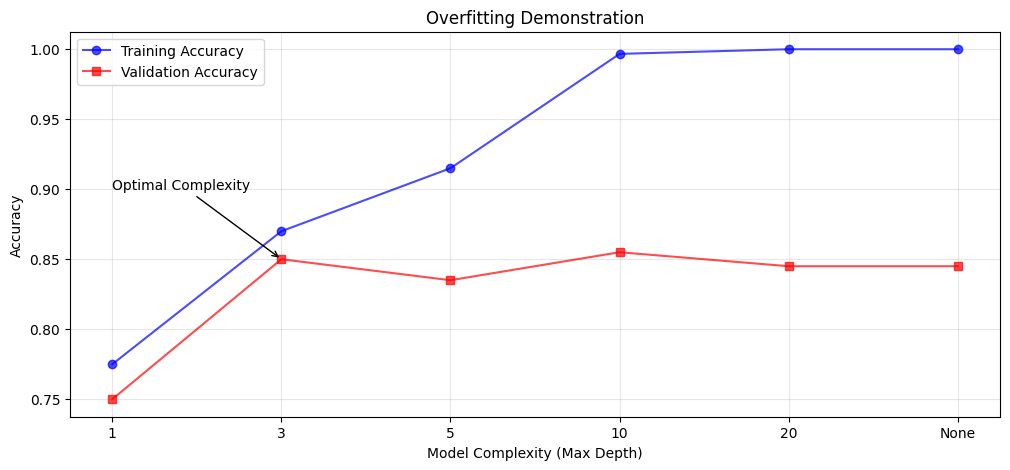


3. FORWARD PROPAGATION SIMULATION
Creating a simple neural network (4 inputs -> 5 hidden -> 1 output):
Forward Propagation Step-by-Step:
----------------------------------------
Step 1: Linear transformation to hidden layer
 Input shape: (3, 4)
 Weights W1 shape: (4, 5)
 Hidden layer output z1 shape: (3, 5)
 After ReLU activation a1 shape: (3, 5)

Step 2: Linear transformation to output layer
 Hidden input shape: (3, 5)
 Weights W2 shape: (5, 1)
 Output layer z2 shape: (3, 1)
 After Sigmoid activation a2 shape: (3, 1)
 Final output range: [0.3782, 0.5151]

Predictions: [0.37817614 0.51508163 0.48319396]
Actual targets: [0 0 1]

Backward Propagation Step-by-Step:
----------------------------------------
Current loss: 0.6421

Step 1: Output layer gradients
 dz2 shape: (3, 1)
 dW2 shape: (5, 1)
 db2 shape: (1, 1)

Step 2: Hidden layer gradients
 dz1 shape: (3, 5)
 dW1 shape: (4, 5)
 db1 shape: (1, 5)

Parameters updated with learning rate: 0.01

4. PERFORMANCE METRICS COMPREHENSIVE DEMO


Text(0.5, 1.0, 'Residuals Plot')

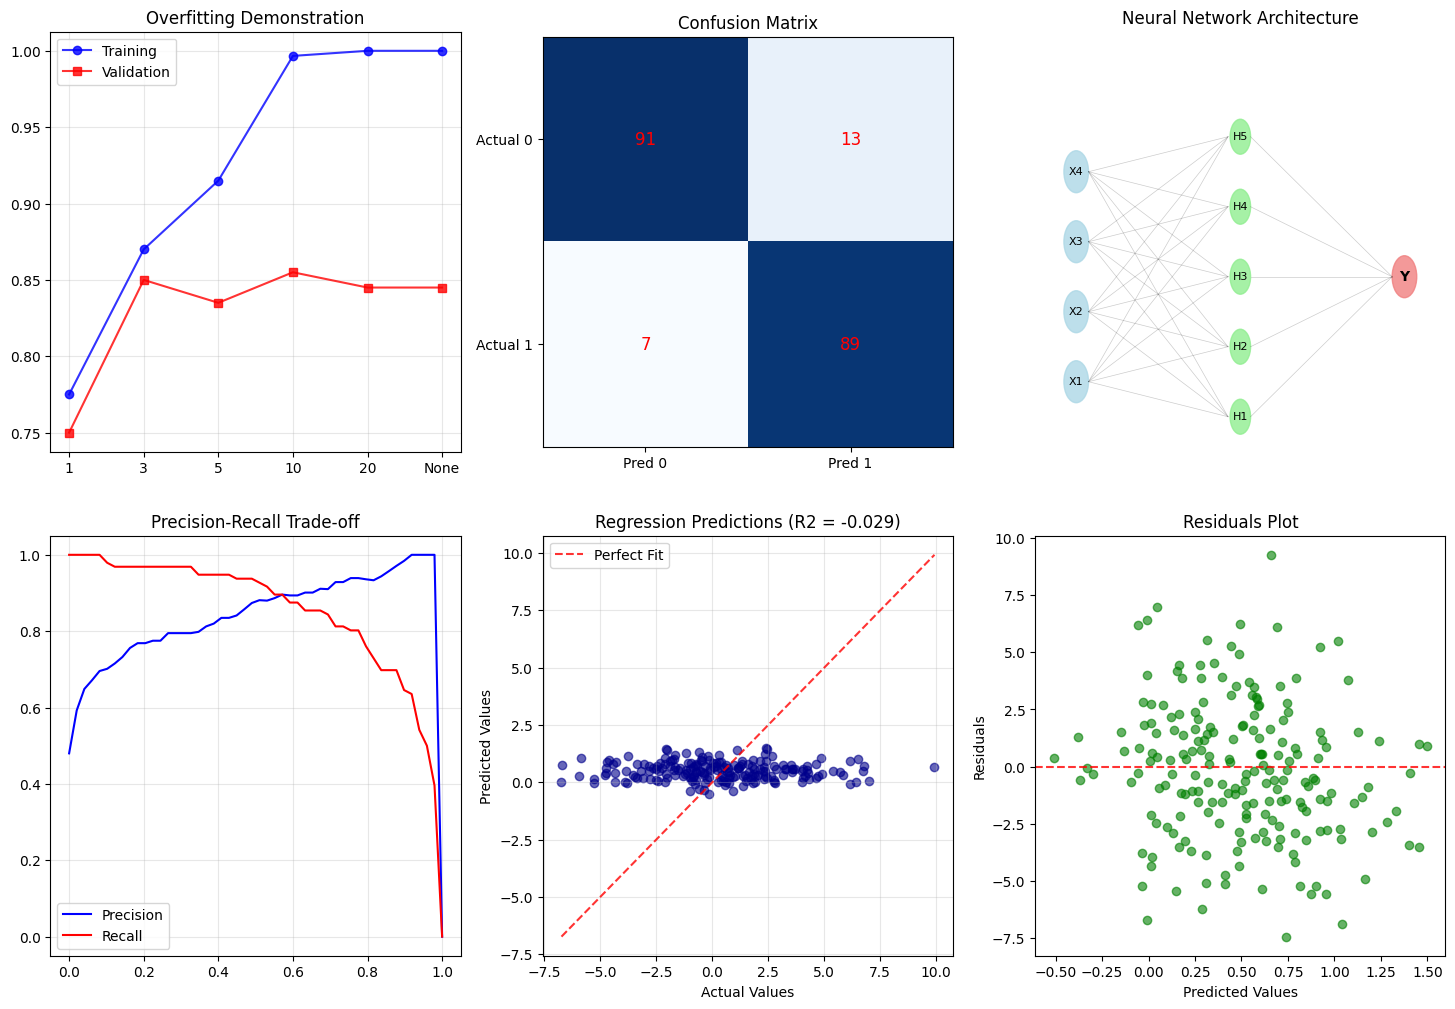

In [20]:
# --- Imports ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, mean_squared_error,
    r2_score, mean_absolute_error
)
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

print("="*70)
print("COMPREHENSIVE MACHINE LEARNING TERMS DEMONSTRATION")
print("="*70)

# =========================================================
# SECTION 1: TRAINING AND TESTING DATASETS
# =========================================================
print("\n" + "="*50)
print("1. TRAINING AND TESTING DATASETS")
print("="*50)

np.random.seed(42)
n_samples = 1000

# Generate synthetic data
X = np.random.randn(n_samples, 4)

# Regression target
y_regression = 2*X[:, 0] + 1.5*X[:, 1] - 0.8*X[:, 2] + 0.3*X[:, 3] + np.random.randn(n_samples)

# Classification target
y_classification = (y_regression > np.median(y_regression)).astype(int)

# Create DataFrame
df = pd.DataFrame(X, columns=['feature_1', 'feature_2', 'feature_3', 'feature_4'])
df['regression_target'] = y_regression
df['classification_target'] = y_classification

print("Dataset Overview:")
print(f"Total samples: {len(df)}")
print(f"Features: {df.columns[:-2].tolist()}")
print(f"Classification target distribution: {np.bincount(y_classification)}")

# Different train-test splits
print("\nDemonstrating different train-test split ratios:")
split_ratios = [0.2, 0.3, 0.4]
for test_size in split_ratios:
    X_train, X_test, y_train, y_test = train_test_split(
        df[['feature_1', 'feature_2', 'feature_3', 'feature_4']],
        df['classification_target'],
        test_size=test_size,
        random_state=42,
        stratify=df['classification_target']
    )
    print(f"Test size {test_size}: Train={len(X_train)}, Test={len(X_test)}")

# Three-way split
print("\nThree-way split (Train-Validation-Test):")
X_temp, X_test, y_temp, y_test = train_test_split(X, y_classification, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)
print(f"Training set: {len(X_train)} samples ({len(X_train)/n_samples*100:.1f}%)")
print(f"Validation set: {len(X_val)} samples ({len(X_val)/n_samples*100:.1f}%)")
print(f"Test set: {len(X_test)} samples ({len(X_test)/n_samples*100:.1f}%)")

# =========================================================
# SECTION 2: OVERFITTING AND UNDERFITTING
# =========================================================
print("\n" + "="*50)
print("2. OVERFITTING AND UNDERFITTING DEMONSTRATION")
print("="*50)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

max_depths = [1, 3, 5, 10, 20, None]
train_scores, val_scores = [], []

print("Decision Tree complexity analysis:")
print("Max Depth | Train Accuracy | Validation Accuracy | Status")
print("-" * 55)

for depth in max_depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train_scaled, y_train)
    train_acc = accuracy_score(y_train, model.predict(X_train_scaled))
    val_acc = accuracy_score(y_val, model.predict(X_val_scaled))
    train_scores.append(train_acc)
    val_scores.append(val_acc)

    if train_acc < 0.75:
        status = "Underfitting"
    elif train_acc - val_acc > 0.1:
        status = "Overfitting"
    else:
        status = "Good fit"

    depth_str = str(depth) if depth else "None"
    print(f"{depth_str:>8} | {train_acc:>13.4f} | {val_acc:>18.4f} | {status}")

# Overfitting plot
plt.figure(figsize=(12, 5))
x_pos = range(len(max_depths))
x_labels = [str(d) if d else "None" for d in max_depths]
plt.plot(x_pos, train_scores, 'o-', label='Training Accuracy', color='blue', alpha=0.7)
plt.plot(x_pos, val_scores, 's-', label='Validation Accuracy', color='red', alpha=0.7)
plt.xlabel('Model Complexity (Max Depth)')
plt.ylabel('Accuracy')
plt.title('Overfitting Demonstration')
plt.xticks(x_pos, x_labels)
plt.legend()
plt.grid(alpha=0.3)
best_idx = np.argmin([abs(t-v) for t, v in zip(train_scores, val_scores)])
plt.annotate('Optimal Complexity',
             xy=(best_idx, val_scores[best_idx]),
             xytext=(best_idx-1, val_scores[best_idx]+0.05),
             arrowprops=dict(arrowstyle='->'), fontsize=10)
plt.show()

# =========================================================
# SECTION 3: FORWARD PROPAGATION SIMULATION
# =========================================================
print("\n" + "="*50)
print("3. FORWARD PROPAGATION SIMULATION")
print("="*50)

class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size) * 0.5
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.5
        self.b2 = np.zeros((1, output_size))
        self.z1 = self.a1 = self.z2 = self.a2 = None

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

    def relu(self, x):
        return np.maximum(0, x)

    def forward_propagation(self, X, verbose=True):
        if verbose:
            print("Forward Propagation Step-by-Step:")
            print("-" * 40)
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.relu(self.z1)
        if verbose:
            print(f"Step 1: Linear transformation to hidden layer")
            print(f" Input shape: {X.shape}")
            print(f" Weights W1 shape: {self.W1.shape}")
            print(f" Hidden layer output z1 shape: {self.z1.shape}")
            print(f" After ReLU activation a1 shape: {self.a1.shape}")
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        if verbose:
            print(f"\nStep 2: Linear transformation to output layer")
            print(f" Hidden input shape: {self.a1.shape}")
            print(f" Weights W2 shape: {self.W2.shape}")
            print(f" Output layer z2 shape: {self.z2.shape}")
            print(f" After Sigmoid activation a2 shape: {self.a2.shape}")
            print(f" Final output range: [{self.a2.min():.4f}, {self.a2.max():.4f}]")
        return self.a2

    def backward_propagation_demo(self, X, y, learning_rate=0.01):
        print("\nBackward Propagation Step-by-Step:")
        print("-" * 40)
        m = X.shape[0]
        loss = -np.mean(y * np.log(self.a2 + 1e-15) + (1 - y) * np.log(1 - self.a2 + 1e-15))
        print(f"Current loss: {loss:.4f}")
        dz2 = self.a2 - y
        dW2 = np.dot(self.a1.T, dz2) / m
        db2 = np.mean(dz2, axis=0, keepdims=True)
        print(f"\nStep 1: Output layer gradients")
        print(f" dz2 shape: {dz2.shape}")
        print(f" dW2 shape: {dW2.shape}")
        print(f" db2 shape: {db2.shape}")
        dz1 = np.dot(dz2, self.W2.T) * (self.z1 > 0)
        dW1 = np.dot(X.T, dz1) / m
        db1 = np.mean(dz1, axis=0, keepdims=True)
        print(f"\nStep 2: Hidden layer gradients")
        print(f" dz1 shape: {dz1.shape}")
        print(f" dW1 shape: {dW1.shape}")
        print(f" db1 shape: {db1.shape}")
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        print(f"\nParameters updated with learning rate: {learning_rate}")
        return loss

print("Creating a simple neural network (4 inputs -> 5 hidden -> 1 output):")
nn = SimpleNeuralNetwork(4, 5, 1)
sample_input = X_train_scaled[:3]
sample_target = y_train[:3].reshape(-1, 1)
output = nn.forward_propagation(sample_input, verbose=True)
print(f"\nPredictions: {output.flatten()}")
print(f"Actual targets: {sample_target.flatten()}")
loss = nn.backward_propagation_demo(sample_input, sample_target)

# =========================================================
# SECTION 4: PERFORMANCE METRICS
# =========================================================
print("\n" + "="*60)
print("4. PERFORMANCE METRICS COMPREHENSIVE DEMO")
print("="*60)

# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

# Regression model
reg_model = LinearRegression()
reg_model.fit(X_train_scaled, y_train)  # dummy regression
y_pred_reg = reg_model.predict(X_test_scaled)
y_test_reg_matched = y_regression[len(X_train)+len(X_val):]

print("CLASSIFICATION METRICS:")
print("-" * 30)
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

cm = confusion_matrix(y_test, y_pred_lr)
print(f"\nConfusion Matrix:\n{cm}")
tn, fp, fn, tp = cm.ravel()
print(f"\nConfusion Matrix Components:")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

print(f"\nMetric Calculations:")
print(f"Accuracy = (TP + TN) / Total = ({tp} + {tn}) / {len(y_test)} = {accuracy:.4f}")
print(f"Precision = TP / (TP + FP) = {tp} / ({tp} + {fp}) = {precision:.4f}")
print(f"Recall = TP / (TP + FN) = {tp} / ({tp} + {fn}) = {recall:.4f}")
print(f"F1-Score = 2 * (Precision * Recall) / (Precision + Recall) = {f1:.4f}")

print(f"\nREGRESSION METRICS:")
print("-" * 30)
mse = mean_squared_error(y_test_reg_matched, y_pred_reg)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_reg_matched, y_pred_reg)
r2 = r2_score(y_test_reg_matched, y_pred_reg)
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")

# =========================================================
# VISUALIZATION
# =========================================================
print("\n" + "="*50)
print("VISUALIZATION OF CONCEPTS")
print("="*50)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Overfitting curves
axes[0, 0].plot(x_pos, train_scores, 'o-', label='Training', color='blue', alpha=0.8)
axes[0, 0].plot(x_pos, val_scores, 's-', label='Validation', color='red', alpha=0.8)
axes[0, 0].set_title('Overfitting Demonstration')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)
axes[0, 0].set_xticks(x_pos)
axes[0, 0].set_xticklabels(x_labels)

# Confusion matrix
im = axes[0, 1].imshow(cm, interpolation='nearest', cmap='Blues')
axes[0, 1].set_title('Confusion Matrix')
tick_marks = np.arange(2)
axes[0, 1].set_xticks(tick_marks)
axes[0, 1].set_yticks(tick_marks)
axes[0, 1].set_xticklabels(['Pred 0', 'Pred 1'])
axes[0, 1].set_yticklabels(['Actual 0', 'Actual 1'])
for i in range(2):
    for j in range(2):
        axes[0, 1].text(j, i, cm[i, j], ha='center', va='center', color='red', fontsize=12)

# Neural Network diagram
axes[0, 2].set_xlim(0, 10)
axes[0, 2].set_ylim(0, 6)
for i in range(4):
    circle = plt.Circle((1, i+1), 0.3, color='lightblue', alpha=0.8)
    axes[0, 2].add_patch(circle)
    axes[0, 2].text(1, i+1, f'X{i+1}', ha='center', va='center', fontsize=8)
for i in range(5):
    circle = plt.Circle((5, i+0.5), 0.25, color='lightgreen', alpha=0.8)
    axes[0, 2].add_patch(circle)
    axes[0, 2].text(5, i+0.5, f'H{i+1}', ha='center', va='center', fontsize=8)
circle = plt.Circle((9, 2.5), 0.3, color='lightcoral', alpha=0.8)
axes[0, 2].add_patch(circle)
axes[0, 2].text(9, 2.5, 'Y', ha='center', va='center', fontsize=10, fontweight='bold')
for i in range(4):
    for j in range(5):
        axes[0, 2].plot([1.3, 4.7], [i+1, j+0.5], 'k-', alpha=0.2, linewidth=0.5)
for i in range(5):
    axes[0, 2].plot([5.25, 8.7], [i+0.5, 2.5], 'k-', alpha=0.2, linewidth=0.5)
axes[0, 2].set_title('Neural Network Architecture')
axes[0, 2].axis('off')

# Precision-Recall tradeoff
thresholds = np.linspace(0, 1, 50)
precisions, recalls = [], []
for threshold in thresholds:
    y_pred_thresh = (y_pred_proba_lr >= threshold).astype(int)
    if np.sum(y_pred_thresh) > 0:
        precisions.append(precision_score(y_test, y_pred_thresh, zero_division=0))
        recalls.append(recall_score(y_test, y_pred_thresh))
    else:
        precisions.append(0)
        recalls.append(0)
axes[1, 0].plot(thresholds, precisions, label='Precision', color='blue')
axes[1, 0].plot(thresholds, recalls, label='Recall', color='red')
axes[1, 0].set_title('Precision-Recall Trade-off')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Regression: Pred vs Actual
axes[1, 1].scatter(y_test_reg_matched, y_pred_reg, alpha=0.6, color='darkblue')
min_val = min(y_test_reg_matched.min(), y_pred_reg.min())
max_val = max(y_test_reg_matched.max(), y_pred_reg.max())
axes[1, 1].plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.8, label='Perfect Fit')
axes[1, 1].set_xlabel('Actual Values')
axes[1, 1].set_ylabel('Predicted Values')
axes[1, 1].set_title(f'Regression Predictions (R2 = {r2:.3f})')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

# Residuals plot
residuals = y_test_reg_matched - y_pred_reg
axes[1, 2].scatter(y_pred_reg, residuals, alpha=0.6, color='green')
axes[1, 2].axhline(y=0, color='red', linestyle='--', alpha=0.8)
axes[1, 2].set_xlabel('Predicted Values')
axes[1, 2].set_ylabel('Residuals')
axes[1, 2].set_title('Residuals Plot')
